In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split as tts

In [2]:
sal = pd.read_csv("E:\\ASSIGNMENT FROM EXCELR\\Simple Linear Regression\\Salary_Data.csv")
sal.head()
sal.dtypes
sal.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [3]:
salm1 = smf.ols("Salary~YearsExperience", data = sal).fit()
salm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        16:02:26   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

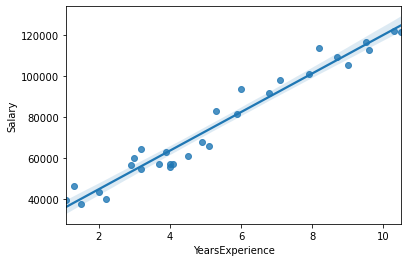

In [4]:
sns.regplot(sal.YearsExperience, sal.Salary)


In [5]:
def rmse(pred, act):
    return np.sqrt(np.mean((pred-act)**2))

In [6]:
traind, testd = tts(sal, test_size = 0.3)

In [7]:
traindm = smf.ols("Salary~YearsExperience", data = traind).fit()
predtrain = traindm.predict(traind)
acttrain = traind.Salary
rmse(predtrain, acttrain)

5781.395956707605

In [8]:
predtest = traindm.predict(testd)
acttest = testd.Salary
rmse(predtest, acttest)

5169.490859283113

In [9]:
newsal = pd.Series([15, 16])
salprediction = pd.DataFrame(newsal, columns = ["YearsExperience"])
salm1.predict(salprediction)

0    167541.635020
1    176991.597342
dtype: float64